In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [240]:
df=pd.read_csv('china_gdp.csv')

df.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


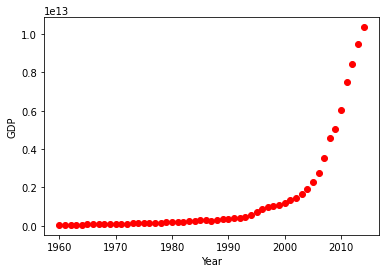

In [241]:
X, y = (df['Year'].values, df['Value'].values)
plt.plot(X, y, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [243]:
lr = LinearRegression()
lr.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [244]:

lr.predict([[2002]])

array([[3.60704681e+12]])

NonLinear

In [245]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train.reshape(-1,1))
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

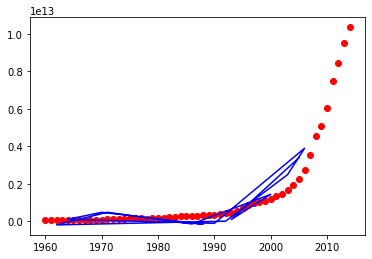

In [246]:
plt.scatter(X, y, color='red')
plt.plot(X_test, pol_reg.predict(poly_reg.fit_transform(X_test.reshape(-1,1))), color='blue')
plt.show()
    


In [247]:
# Predicting a new result with Polymonial Regression
ans = pol_reg.predict(poly_reg.fit_transform([[2020]]))

In [248]:
theta0 = pol_reg.intercept_
_, theta1, theta2, theta3,theta4 = pol_reg.coef_
theta0, theta1


(-5.187103222793425e+17, 600002346.142498)

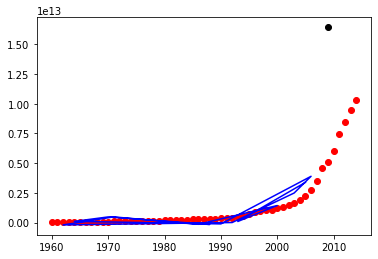

In [249]:
plt.scatter(2009, ans, c = "black")
plt.scatter(X, y, color='red')
plt.plot(X_test, pol_reg.predict(poly_reg.fit_transform(X_test.reshape(-1,1))), color='blue')
plt.show()

In [250]:
#prediction on traing dataset

train_pred = pol_reg.predict(poly_reg.fit_transform(X_train.reshape(-1,1)))
#evaluate model on training data
rmse_train = np.sqrt(mean_squared_error(y_train,train_pred))
r2_train = r2_score(y_train,train_pred)


rmse_train, r2_train


(426486540038.9162, 0.9765458648475993)

In [251]:
#On test data
test_pre = pol_reg.predict(poly_reg.fit_transform(X_test.reshape(-1,1)))
rmse_test =  np.sqrt(mean_squared_error(y_test,test_pre))
r2_test = r2_score(y_test,test_pre)

rmse_test, r2_test

(579675678894.8506, 0.5348690889162042)

regularization

In [252]:
l_train_pred= pol_reg.predict(poly_reg.fit_transform(X_train.reshape(-1,1)))
print(np.sqrt(mean_squared_error(X_train,l_train_pred)))
print(r2_score(y_train, l_train_pred))

l_test_pred= pol_reg.predict(poly_reg.fit_transform(y_test.reshape(-1,1)))
print(np.sqrt(mean_squared_error(X_test,l_test_pred)))
print(r2_score(y_test, l_test_pred))

3223826953387.9297
0.9765458648475993
1.6810738596682514e+54
-3.911817936351005e+84


In [ ]:
rr = Lasso(alpha=1.0)
rr.fit(X_train.reshape(-1,1), y_train) 
pred_train_rr= rr.predict(X_train.reshape(-1,1))
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test.reshape(-1,1))
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

In [ ]:
df = pd.read_csv('PCE.csv') 
print(df.shape)
df.describe()
df.columns
df.head()

In [260]:
predictors = ['PCE','POP']
target_column = ['UNEMPLOY']

In [261]:
X = df[predictors].values
y = df[target_column].values



In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape); print(X_test.shape)

(593, 2)
(149, 2)


In [258]:

rr = Ridge(alpha=1.0)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

ValueError: ignored

In [ ]:
from sklearn.linear_model import LassoCV
from numpy import arange
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model_lasso = LassoCV(alphas=arange(0,1,0.01), cv=cv, n_jobs=1)

model_lasso.fit(X,y)
pred_y = model_lasso.predict(X_test)
r2_score(y_test,pred_y)

In [278]:
c = pd.read_csv('ChurnData.csv')
c.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,20.75,0.0,15.25,35.7,42.00,211.45,125.0,1.0,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,0.00,0.0,0.00,0.0,288.80,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,0.00,0.0,0.00,0.0,157.05,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,45.00,50.1,23.25,64.9,239.55,1873.05,880.0,1.0,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,22.00,0.0,23.75,0.0,47.45,166.10,145.0,1.0,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [ ]:
churn_df = c[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

In [ ]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
y = np.asarray(churn_df['churn'])
y [0:5]

In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

In [270]:

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


In [272]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [273]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [274]:
LR.score(X_test,y_test)

0.75

In [ ]:
LR.predict_proba(X_test)

In [276]:
cm = confusion_matrix(y_test, LR.predict(X_test))
cm

array([[24,  1],
       [ 9,  6]])

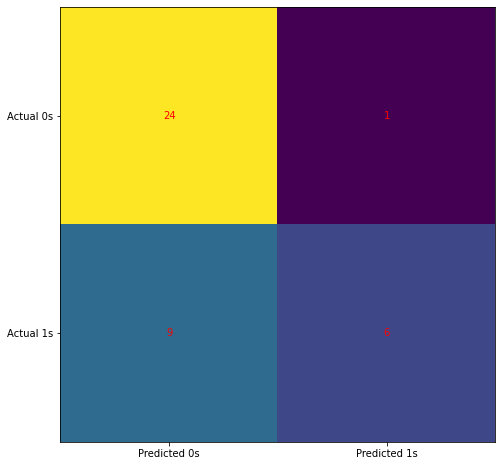

In [277]:


fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()